# USA Names - Data Visualization
Visualization of the data present in the dataset *usa-names*.

The issues questions are answered:
- Most popular names by year
- Most popular names since 1910
- Less popular names
- Unisex names
- Uknowns & uknowns by year


### Import Libraries

In [1]:
#Data Analysis
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery 
#Declare the Big Query Client
bq = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


## Data exploration

Name of tables, size of data, number of rows

In [2]:
tables_info_query = """
SELECT
    *
FROM
    `bigquery-public-data.usa_names.__TABLES__`
"""

table_info_result = bq.query(tables_info_query).to_dataframe()

print('The dataset size is ' + str(round(table_info_result['size_bytes'].sum() /(2**30),3)) + ' GB with ' +  str(table_info_result['row_count'].sum()) + ' rows.')
print('Number of tables: '+ str(table_info_result['table_id'].count()) + '\nTables name: ')
print(table_info_result['table_id'])

The dataset size is 0.336 GB with 11675342 rows.
Number of tables: 2
Tables name: 
0       usa_1910_2013
1    usa_1910_current
Name: table_id, dtype: object


In [3]:
tables_info_query = """
SELECT 
    *
FROM
    `bigquery-public-data.usa_names.usa_1910_current`
LIMIT 100
"""

table_info_result = bq.query(tables_info_query).to_dataframe()

table_info_result.head()

,state,gender,year,name,number
0,MI,F,1910,Helen,368
1,MI,F,1910,Mary,349
2,MI,F,1910,Margaret,272
3,MI,F,1910,Dorothy,265
4,MI,F,1910,Ruth,212


### What are the most popular name of USA each year?

In [4]:
name_by_year_query = """
SELECT 
    year,
    name,
    gender,
    SUM(number) appearances
FROM
    `bigquery-public-data.usa_names.usa_1910_current`
GROUP BY gender, year, name
"""

ranking_name_by_year_query = """
SELECT
    year,
    name,
    gender,
    appearances,
    RANK() OVER (PARTITION BY year, gender ORDER  BY appearances DESC) position

FROM ("""+ name_by_year_query +""")
"""

mp_name_by_year_query = """
SELECT
    year,
    name,
    gender,
    appearances
FROM ("""+ranking_name_by_year_query+""")
WHERE position = 1
ORDER BY year DESC, gender
"""

mp_name_by_year_result = bq.query(mp_name_by_year_query).to_dataframe()

#Most popular names of the last 5 years
mp_name_by_year_result.head(10)

,year,name,gender,appearances
0,2019,Olivia,F,18451
1,2019,Liam,M,20502
2,2018,Emma,F,18757
3,2018,Liam,M,19915
4,2017,Emma,F,19830
5,2017,Liam,M,18821
6,2016,Emma,F,19517
7,2016,Noah,M,19144
8,2015,Emma,F,20463
9,2015,Noah,M,19646


### What are the most popular name of USA since 1910?

In [5]:
most_popular_name_query = """
SELECT 
    name,
    gender,
    SUM(number) appearances
FROM
    `bigquery-public-data.usa_names.usa_1910_current`
GROUP BY gender, name
"""

ranking_mp_name_query = """
SELECT
    name,
    gender,
    appearances,
    RANK() OVER (PARTITION BY gender ORDER  BY appearances DESC) position
FROM ("""+ most_popular_name_query +""")
"""

the_mp_name_query = """
SELECT
    name,
    gender,
    appearances,
    position
FROM ("""+ranking_mp_name_query+""")
WHERE position <= 3
ORDER BY gender, position
"""

the_mp_name_result = bq.query(the_mp_name_query).to_dataframe()

#Most popular names
the_mp_name_result.head(6)

,name,gender,appearances,position
0,Mary,F,3743561,1
1,Patricia,F,1569296,2
2,Elizabeth,F,1545720,3
3,James,M,5010765,1
4,John,M,4878703,2
5,Robert,M,4739061,3


### List of Unique Names

In [6]:
unique_rnk_name_query = """
SELECT
    name,
    gender,
    appearances,
    RANK() OVER (PARTITION BY gender ORDER  BY appearances) position
FROM ("""+ most_popular_name_query +""")
"""

unique_name_query = """
SELECT
    name,
    gender,
    appearances
FROM ("""+ unique_rnk_name_query +""")
WHERE position = 1
ORDER BY gender, name
"""

unique_name_result = bq.query(unique_name_query).to_dataframe()

# Display the results
female_name = ""
male_name = ""
print('Unique Name List:')
print('Gender: Female. \nNumber of appearances: ' + str(unique_name_result[unique_name_result['gender'] == 'F'].iloc[0]['appearances']) + '\nList:')

for i, name in enumerate(unique_name_result[unique_name_result['gender'] == 'F']['name']):
    female_name =  female_name + " "+ name
print(female_name)
    
print('\nGender: Male. \nNumber of appearances: '+ str(unique_name_result[unique_name_result['gender'] == 'M'].iloc[0]['appearances'])  + '\nList:')

for i, name in enumerate(unique_name_result[unique_name_result['gender'] == 'M']['name']):
    male_name =  male_name + " "+ name
print(male_name)

Unique Name List:
Gender: Female. 
Number of appearances: 5
List:
 Aalaya Aalliyah Aamani Aamori Aanshi Aaren Aariya Aasha Aashritha Aasia Abagayle Abaigeal Abbiegail Abbye Abigayl Abiola Abreanna Abrina Abyan Ace Acie Adahlia Adaia Adalay Adalhi Adalida Adanelly Adanya Addalie Addi Addis Adelai Adelayda Adelena Adelfina Adelise Aderinsola Adessa Adesuwa Adeya Adgie Adianez Adileni Adonai Adonna Adrieanna Adriella Adwoa Aeliana Aelin Aemilia Aerilyn Aerolynn Afomia Afrah Ageliki Agena Ahlaam Ahlana Ahliyah Ahniah Ahniyah Ahriana Aibhlinn Aidaly Aidelyn Aileene Ailis Aiman Aimme Aino Airiel Aizza Ajane Ajena Ajwa Akansha Akaylah Akaysha Akeisha Akhila Akie Akiyah Akyli Al Alaena Alaija Alamar Alannis Alante Alaylah Alayzia Alberdia Albesa Albie Albirda Aldah Aldean Aleanna Aleiya Aleja Alejah Aleksia Alexina Alexssa Alexsys Aleyshka Alfonsina Alfreida Algia Aliany Alianys Alicha Alie Aliea Aliena Alik Alique Aliyaah Alkeria Allaina Allexa Allianna Allora Allycia Almer Almerinda Alsace A

### What names are used for both sex?

In [7]:
both_sex_name_query ="""
SELECT
    name
FROM ("""+ most_popular_name_query +""")
GROUP BY name
HAVING COUNT(*) = 2
ORDER BY name
"""

both_sex_name_result = bq.query(both_sex_name_query).to_dataframe()

print('Unisex names: \nNumber of unisex names: ' + str(both_sex_name_result.shape[0]) + '\nList of names: ')

unisex_names = ""

for i, name in enumerate(both_sex_name_result['name']):
    unisex_names = unisex_names + " " + name
print(unisex_names)

Unisex names: 
Number of unisex names: 3090
List of names: 
 Aaliyah Aaren Aarin Aaron Aarya Aaryn Abbie Abby Abeer Abigail Abigayle Abisai Abraham Abrar Abriel Abyan Ace Acie Adair Adam Adama Addie Addis Addison Adel Adell Aden Adi Adison Adler Adley Adonai Adrain Adrean Adrian Adriana Adriane Adriel Adrien Adrienne Afnan Afton Agam Ah Ahmari Aidan Aiden Aidyn Aiman Aimar Aime Ainsley Airam Ajani Akari Akira Al Alaa Alan Alana Alante Albert Alberta Alberto Albie Aldean Alden Aldine Alec Alejandra Alejandro Alesha Alex Alexa Alexander Alexandr Alexandra Alexandria Alexes Alexi Alexia Alexie Alexis Alexiz Alexsis Alexx Alexy Alexys Alfred Alfredo Ali Alice Alicia Alijah Alik Alika Alisha Alison Alissa Alix Aliyah Alize Allante Allen Allie Allison Allyn Alma Almer Alondra Alpha Altair Alva Alvie Alvin Alvis Aly Alyssa Aman Amanda Amandeep Amando Amani Amanpreet Amar Amara Amare Amaree Amari Amarie Amarii Amaris Amauri Amber Amel Amelia Amen Amere Americus Ameya Ami Amil Amir Amit Amor Am

This list has a lot of weird results. For example:
- Emily, Giselle, Gladys, Sylvia ... (sounds weird for males)
- Adam, Mario, Pablo, Tristan ... (sounds weird for females)

**How to clean the results?** Using the proportion if the proportion is in the same magnitude the name could be use for male and females.

In [8]:
limit = 5
min_appearances = 1000

clean_unisex_subquery = """
SELECT
    name,
    appearances
FROM ("""+ most_popular_name_query +""")
WHERE name IN ("""+ both_sex_name_query + """) AND gender =
"""

clean_unisex_query = """
SELECT
    FEMALES.name
FROM ("""+ clean_unisex_subquery + """ 'F') FEMALES
INNER JOIN ("""+ clean_unisex_subquery  + """ 'M') MALES ON FEMALES.name = MALES.name
WHERE FEMALES.appearances/MALES.appearances <= """+ str(limit) +""" AND MALES.appearances/FEMALES.appearances <= """ + str(limit) + """ 
AND FEMALES.appearances > """ + str(min_appearances) + """ AND MALES.appearances > """ + str(min_appearances) + """
ORDER BY FEMALES.name
"""


clean_unisex_result = bq.query(clean_unisex_query).to_dataframe()

print('Unisex names: \nNumber of unisex names: ' + str(clean_unisex_result.shape[0]) + '\nPercentage of reduction: '+ str(round(((both_sex_name_result.shape[0]-clean_unisex_result.shape[0])/both_sex_name_result.shape[0])*100 , 2)) + '% \nList of names: ')

unisex_clean_names = ""

for i, name in enumerate(clean_unisex_result['name']):
    unisex_clean_names = unisex_clean_names + " " + name
print(unisex_clean_names)


Unisex names: 
Number of unisex names: 154
Percentage of reduction: 95.02% 
List of names: 
 Ali Alva Amari Angel Arden Ariel Armani Artie Ashton Aubrey Austyn Avery Azariah Baby Billie Blair Briar Britt Camdyn Campbell Carey Carrol Casey Chandler Channing Charley Claudie Cleo Dakota Dana Darian Dee Devan Devon Devyn Dominique Dominque Dusty Elisha Emerson Emery Emory Finley Frankie Gale Garnett Gerry Guadalupe Harley Hayden Infant Ivory Jackie Jadyn Jael Jaiden Jaidyn Jaime Jamie Jan Jaylin Jessie Jody Johnie Johnnie Jordan Justice Kalani Kamari Karon Kasey Kendal Kendall Kenyatta Kerry Kirby Kris Kristian Lacy Landry Lashawn Lavern Laverne Lavon Lee Leighton Lennon Lennox Leslie Loren Lorenza Lupe Lynn Marion Marlyn Maxie Mckinley Merle Michal Michel Milan Monroe Montana Nicola Noel Oakley Ocie Odell Ollie Palmer Pat Payton Peyton Phoenix Quinn Reese Reilly Remington Remy Rene Rian Riley River Robbie Rory Rosario Rowan Royal Ryley Sage Sammie Santana Sawyer Shay Shea Shiloh Sidney Sk

Something peculiar found is that the name **Unknown**
### How many uknowns are?


In [9]:
uknowns_query = most_popular_name_query + """HAVING name = 'Unknown'"""

uknowns_result = bq.query(uknowns_query).to_dataframe()

print('There are a total number of ' + str(uknowns_result['appearances'].sum()) + ' unknowns')
print('Females: ' + str(uknowns_result[uknowns_result['gender'] == 'F'].iloc[0]['appearances']) )
print('Males: '+ str(uknowns_result[uknowns_result['gender'] == 'M'].iloc[0]['appearances']))

There are a total number of 14551 unknowns
Females: 7444
Males: 7107


Is this a failure? Probably
Has this improved year after year? Let's see this

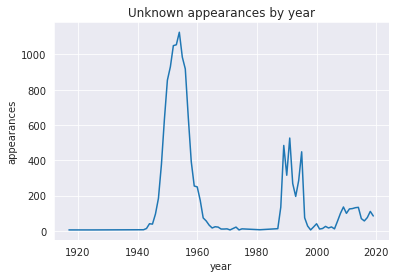

In [10]:
uknowns_by_year_query = """
SELECT 
    year,
    SUM(number) appearances
FROM
    `bigquery-public-data.usa_names.usa_1910_current`
GROUP BY  year, name
HAVING name = 'Unknown'
ORDER BY year
"""

uknowns_by_year_result = bq.query(uknowns_by_year_query).to_dataframe()

sns.set_style("darkgrid")
fig, ax = plt.subplots()
sns.lineplot(x="year", y="appearances", 
             data=uknowns_by_year_result)
plt.title('Unknown appearances by year')
plt.show()